In [2]:
%matplotlib notebook
%matplotlib ipympl
%matplotlib ipympl

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path = Path("../data/diabetes_dataset00.csv")

In [5]:
original_data = pd.read_csv(path)
original_data.value_counts("Target")


Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64

Type 2 Diabetes

In [6]:
#Select Type 2 Data and reset index
type2_df = original_data[original_data['Target'] == 'Type 2 Diabetes']
type2_df.reset_index()
print(len(type2_df))
print(type2_df.value_counts('Family History'))
print(type2_df.value_counts('Smoking Status'))
print(type2_df.value_counts('Alcohol Consumption'))

5397
Family History
Yes    2746
No     2651
Name: count, dtype: int64
Smoking Status
Smoker        2706
Non-Smoker    2691
Name: count, dtype: int64
Alcohol Consumption
Low         1861
Moderate    1786
High        1750
Name: count, dtype: int64


Type 2 Smoking Status and Family History

In [7]:
#Get needed columns
family_smoking_type2_df = type2_df[['Family History', 'Smoking Status']]

#Count, Sort, and Seperate Categories
type2_fs = pd.DataFrame(family_smoking_type2_df.value_counts())
type2_fs = type2_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
type2_yesfam_smoke = type2_fs[type2_fs['Family History'] == 'Yes']
type2_nofam_smoke = type2_fs[type2_fs['Family History'] == 'No']

print(type2_yesfam_smoke)
print(type2_nofam_smoke)

  Family History Smoking Status  count
0            Yes         Smoker   1359
2            Yes     Non-Smoker   1387
  Family History Smoking Status  count
1             No         Smoker   1347
3             No     Non-Smoker   1304


Type 2 Family History vs. Alcohol Consumption

In [8]:
#Desired order of data display
sorting = ['Low', 'Moderate', 'High']

#Get the columns needed
family_drinking_type2_df = type2_df[['Family History', 'Alcohol Consumption']]

#Count values, make DataFrame and sort into categories
type2_fd = pd.DataFrame(family_drinking_type2_df.value_counts())
type2_fd = type2_fd.sort_values(by=['Alcohol Consumption']).reset_index()
type2_yesfam_drink = type2_fd[type2_fd['Family History'] == 'Yes']
type2_nofam_drink = type2_fd[type2_fd['Family History'] == 'No']

#Sort data order for better presentation
pd.options.mode.copy_on_write = True
type2_yesfam_drink.sort_values(by='Alcohol Consumption', key=lambda 
                               column: column.map(lambda e: sorting.index(e)), inplace=True)
type2_nofam_drink.sort_values(by='Alcohol Consumption', key=lambda 
                              column: column.map(lambda e: sorting.index(e)), inplace=True)

print(type2_yesfam_drink)
print(type2_nofam_drink)



  Family History Alcohol Consumption  count
3            Yes                 Low    922
4            Yes            Moderate    909
0            Yes                High    915
  Family History Alcohol Consumption  count
2             No                 Low    939
5             No            Moderate    877
1             No                High    835


Type 1 Diabetes

In [9]:
#Select Type 1 Data
type1_df = original_data[original_data['Target'] == 'Type 1 Diabetes']
type1_df.reset_index()
print(len(type1_df))
print(type1_df.value_counts('Family History'))
print(type1_df.value_counts('Smoking Status'))
print(type1_df.value_counts('Alcohol Consumption'))

5446
Family History
Yes    2729
No     2717
Name: count, dtype: int64
Smoking Status
Non-Smoker    2725
Smoker        2721
Name: count, dtype: int64
Alcohol Consumption
Low         1858
Moderate    1795
High        1793
Name: count, dtype: int64


Type 1 Family History vs. Smoking

In [10]:
#Get the needed columns
family_smoking_type1_df = type1_df[['Family History', 'Smoking Status']]

#Count and Sort Categories
type1_fs = pd.DataFrame(family_smoking_type1_df.value_counts())
type1_fs = type1_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
type1_fs_df = pd.DataFrame(type1_fs)
type1_yesfam_smoke = type1_fs_df[type1_fs_df['Family History'] == 'Yes']
type1_nofam_smoke = type1_fs_df[type1_fs_df['Family History'] == 'No']

print(type1_yesfam_smoke)
print(type1_nofam_smoke)

  Family History Smoking Status  count
0            Yes         Smoker   1377
3            Yes     Non-Smoker   1352
  Family History Smoking Status  count
1             No         Smoker   1344
2             No     Non-Smoker   1373


Type 1 Family History vs. Alcohol Consumption

In [11]:
#Get the needed columns and reset index
family_drinking_type1_df = type1_df[['Family History', 'Alcohol Consumption']]
family_drinking_type1_df.reset_index(drop=True)

#Make DataFrame and sort into counted categories
type1_fd = pd.DataFrame(family_drinking_type1_df.value_counts())
type1_fd = type1_fd.sort_values(by=['Alcohol Consumption']).reset_index()
type1_yesfam_drink = type1_fd[type1_fd['Family History'] == 'Yes']
type1_nofam_drink = type1_fd[type1_fd['Family History'] == 'No']

#Change order to Low, Moderate, High
type1_yesfam_drink.sort_values(by='Alcohol Consumption', key=lambda 
                               column: column.map(lambda e: sorting.index(e)), inplace=True)
type1_nofam_drink.sort_values(by='Alcohol Consumption', key=lambda 
                              column: column.map(lambda e: sorting.index(e)), inplace=True)


print(type1_yesfam_drink)
print(type1_nofam_drink)

  Family History Alcohol Consumption  count
2            Yes                 Low    941
5            Yes            Moderate    883
0            Yes                High    905
  Family History Alcohol Consumption  count
3             No                 Low    917
4             No            Moderate    912
1             No                High    888


Type 3c (Pancreatogenic Diabetes)

In [12]:
#Select Type 3c Data
type3c_df = original_data[original_data['Target'] == 'Type 3c Diabetes (Pancreatogenic Diabetes)']
type3c_df.reset_index()
print(len(type3c_df))
print(type3c_df.value_counts('Family History'))
print(type3c_df.value_counts('Smoking Status'))
print(type3c_df.value_counts('Alcohol Consumption'))

5320
Family History
No     2662
Yes    2658
Name: count, dtype: int64
Smoking Status
Smoker        2704
Non-Smoker    2616
Name: count, dtype: int64
Alcohol Consumption
Low         1826
Moderate    1765
High        1729
Name: count, dtype: int64


Type 3c (Pancreatogenic Diabetes) Family History vs. Smoking

In [13]:
#Get the needed columns
family_smoking_type3c_df = type3c_df[['Family History', 'Smoking Status']]

#Count and sort Categories
type3c_fs = pd.DataFrame(family_smoking_type3c_df.value_counts())
type3c_fs = type3c_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
type3c_yesfam_smoke = type3c_fs[type3c_fs['Family History'] == 'Yes']
type3c_nofam_smoke = type3c_fs[type3c_fs['Family History'] == 'No']

print(type3c_yesfam_smoke)
print(type3c_nofam_smoke)

  Family History Smoking Status  count
1            Yes         Smoker   1348
2            Yes     Non-Smoker   1310
  Family History Smoking Status  count
0             No         Smoker   1356
3             No     Non-Smoker   1306


Type 3c (Pancreatogenic Diabetes) Family History vs. Alcohol Consumption

In [14]:
#Select the needed columns
family_drinking_type3c_df = type3c_df[['Family History', 'Alcohol Consumption']]

#Count and sort Categories
type3c_fd = pd.DataFrame(family_drinking_type3c_df.value_counts())
type3c_fd = type3c_fd.sort_values(by=['Alcohol Consumption']).reset_index()
type3c_yesfam_drink = type3c_fd[type3c_fd['Family History'] == 'Yes']
type3c_nofam_drink = type3c_fd[type3c_fd['Family History'] == 'No']

#Order Data
type3c_yesfam_drink.sort_values(by='Alcohol Consumption', key=lambda 
                               column: column.map(lambda e: sorting.index(e)), inplace=True)
type3c_nofam_drink.sort_values(by='Alcohol Consumption', key=lambda 
                              column: column.map(lambda e: sorting.index(e)), inplace=True)


print(type3c_yesfam_drink)
print(type3c_nofam_drink)

  Family History Alcohol Consumption  count
3            Yes                 Low    906
4            Yes            Moderate    883
0            Yes                High    869
  Family History Alcohol Consumption  count
2             No                 Low    920
5             No            Moderate    882
1             No                High    860


Wolfram Syndrome

In [15]:
#Select the Wolfram Syndrome Data
wolfram_df = original_data[original_data['Target'] == 'Wolfram Syndrome']
wolfram_df.reset_index()
print(len(wolfram_df))
print(wolfram_df.value_counts('Family History'))
print(wolfram_df.value_counts('Smoking Status'))
print(wolfram_df.value_counts('Alcohol Consumption'))

5315
Family History
Yes    2703
No     2612
Name: count, dtype: int64
Smoking Status
Smoker        2659
Non-Smoker    2656
Name: count, dtype: int64
Alcohol Consumption
High        1813
Moderate    1778
Low         1724
Name: count, dtype: int64


Wolfram Family History vs. Smoking Status

In [16]:
#Select the needed columns
family_smoking_wolfram_df = wolfram_df[['Family History', 'Smoking Status']]
#Make DataFrame and sort values
wolfram_fs = pd.DataFrame(family_smoking_wolfram_df.value_counts())
wolfram_fs = wolfram_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
wolfram_yesfam_smoke = wolfram_fs[wolfram_fs['Family History'] == 'Yes']
wolfram_nofam_smoke = wolfram_fs[wolfram_fs['Family History'] == 'No']

print(wolfram_yesfam_smoke)
print(wolfram_nofam_smoke)

  Family History Smoking Status  count
0            Yes         Smoker   1364
2            Yes     Non-Smoker   1339
  Family History Smoking Status  count
1             No         Smoker   1295
3             No     Non-Smoker   1317


Wolfram Syndrome Family History vs. Alcohol Consumption

In [17]:
#Select the needed columns
family_drinking_wolfram_df = wolfram_df[['Family History', 'Alcohol Consumption']]
#Count and sort into categories
wolfram_fd = pd.DataFrame(family_drinking_wolfram_df.value_counts())
wolfram_fd = wolfram_fd.sort_values(by=['Alcohol Consumption']).reset_index()
wolfram_yesfam_drink = wolfram_fd[wolfram_fd['Family History'] == 'Yes']
wolfram_nofam_drink = wolfram_fd[wolfram_fd['Family History'] == 'No']

#Order Data
wolfram_yesfam_drink.sort_values(by='Alcohol Consumption', key=lambda 
                               column: column.map(lambda e: sorting.index(e)), inplace=True)
wolfram_nofam_drink.sort_values(by='Alcohol Consumption', key=lambda 
                              column: column.map(lambda e: sorting.index(e)), inplace=True)


print(wolfram_yesfam_drink)
print(wolfram_nofam_drink)

  Family History Alcohol Consumption  count
2            Yes                 Low    865
4            Yes            Moderate    909
0            Yes                High    929
  Family History Alcohol Consumption  count
3             No                 Low    859
5             No            Moderate    869
1             No                High    884


Gestational Diabetes

In [18]:
#Select Gestational Diabetes data
gestational_df = original_data[original_data['Target'] == 'Gestational Diabetes']
gestational_df.reset_index()
print(len(gestational_df))
print(gestational_df.value_counts('Family History'))
print(gestational_df.value_counts('Smoking Status'))
print(gestational_df.value_counts('Alcohol Consumption'))

5344
Family History
Yes    2673
No     2671
Name: count, dtype: int64
Smoking Status
Smoker        2694
Non-Smoker    2650
Name: count, dtype: int64
Alcohol Consumption
Low         1826
High        1782
Moderate    1736
Name: count, dtype: int64


Gestational Family History vs Smoking Status

In [19]:
#Select the columns needed
family_smoking_gestational_df = gestational_df[['Family History', 'Smoking Status']]

#Count and Sort into categories
gestational_fs = pd.DataFrame(family_smoking_gestational_df.value_counts())
gestational_fs = gestational_fs.sort_values(by=['Smoking Status'], ascending=False).reset_index()
gestational_yesfam_smoke = gestational_fs[gestational_fs['Family History'] == 'Yes']
gestational_nofam_smoke = gestational_fs[gestational_fs['Family History'] == 'No']

print(gestational_yesfam_smoke)
print(gestational_nofam_smoke)

  Family History Smoking Status  count
1            Yes         Smoker   1311
2            Yes     Non-Smoker   1362
  Family History Smoking Status  count
0             No         Smoker   1383
3             No     Non-Smoker   1288


Gestational Family History vs. Alcohol Consumption

In [20]:
#Select the needed columns
family_drinking_gestational_df = gestational_df[['Family History', 'Alcohol Consumption']]

#Count and sort into categories
gestational_fd = pd.DataFrame(family_drinking_gestational_df.value_counts())
gestational_fd = gestational_fd.sort_values(by=['Alcohol Consumption']).reset_index()
gestational_yesfam_drink = gestational_fd[gestational_fd['Family History'] == 'Yes']
gestational_nofam_drink = gestational_fd[gestational_fd['Family History'] == 'No']

#Order Data
gestational_yesfam_drink.sort_values(by='Alcohol Consumption', key=lambda 
                               column: column.map(lambda e: sorting.index(e)), inplace=True)
gestational_nofam_drink.sort_values(by='Alcohol Consumption', key=lambda 
                              column: column.map(lambda e: sorting.index(e)), inplace=True)


print(gestational_yesfam_drink)
print(gestational_nofam_drink)

  Family History Alcohol Consumption  count
2            Yes                 Low    922
5            Yes            Moderate    854
0            Yes                High    897
  Family History Alcohol Consumption  count
3             No                 Low    904
4             No            Moderate    882
1             No                High    885


In [21]:
groups = ['Type 1', 'Type 2', 'Type 3c', 'Wolfram Syndrome', 'Gestational Diabetes']
#Make the Categories for Family History: Yes
type1_cat1 = type1_yesfam_smoke['Smoking Status']
type1_count1 = type1_yesfam_smoke['count']
type2_cat2 = type2_yesfam_smoke['Smoking Status']
type2_count2 = type2_yesfam_smoke['count']
type3c_cat3 = type3c_yesfam_smoke['Smoking Status']
type3c_count3 = type3c_yesfam_smoke['count']
wolfram_cat4 = wolfram_yesfam_smoke['Smoking Status']
wolfram_count4 = wolfram_yesfam_smoke['count']
gest_cat5 = gestational_yesfam_smoke['Smoking Status']
gest_count5 = gestational_yesfam_smoke['count']
#Categories for Family History: No
type1_cat6 = type1_nofam_smoke['Smoking Status']
type1_count6 = type1_nofam_smoke['count']
type2_cat7 = type2_nofam_smoke['Smoking Status']
type2_count7 = type2_nofam_smoke['count']
type3c_cat8 = type3c_nofam_smoke['Smoking Status']
type3c_count8 = type3c_nofam_smoke['count']
wolfram_cat9 = wolfram_nofam_smoke['Smoking Status']
wolfram_count9 = wolfram_nofam_smoke['count']
gest_cat10 = gestational_nofam_smoke['Smoking Status']
gest_count10 = gestational_nofam_smoke['count']

type1_yesfam_smoke


,Family History,Smoking Status,count
0,Yes,Smoker,1377
3,Yes,Non-Smoker,1352


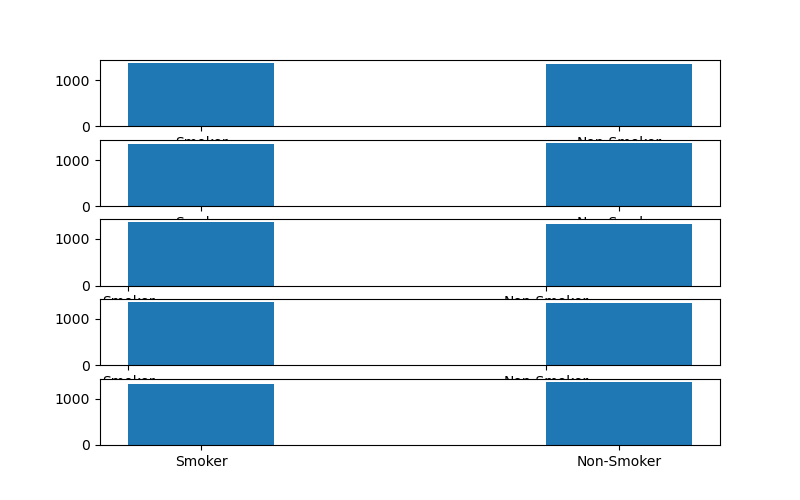

In [51]:
groups = ['Type 1', 'Type 2', 'Type 3c', 'Wolfram Syndrome', 'Gestational Diabetes']
bar_width = 0.35

x = np.arange(len(groups))
#even_ticks = np.arange(number_of_ticks)

#x = np.arange(0.5, 1, 5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(8, 5))
bar1 = ax1.bar(type1_cat1, type1_count1, bar_width, label='Type 1', align='center')
bar2 = ax2.bar(type2_cat2, type2_count2, bar_width, label='Type 2', align='center')
bar3 = ax3.bar(type3c_cat3, type3c_count3, bar_width, label='Type 3c', align='edge')
bar4 = ax4.bar(wolfram_cat4, wolfram_count4, bar_width, label='Wolfram Syndrome', align='edge')
bar5 = ax5.bar(gest_cat5, gest_count5, bar_width, label='Gestational Diabetes', align='center')
plt.subplots_adjust(wspace=0.3)

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel('Number of Patients')
ax.set_title('Patients with Family History')
plt.show()


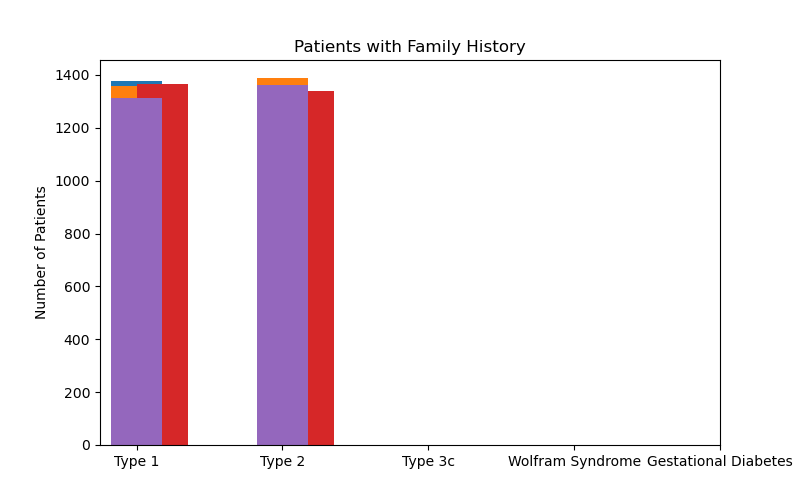

In [60]:
groups = ['Type 1', 'Type 2', 'Type 3c', 'Wolfram Syndrome', 'Gestational Diabetes']
bar_width = 0.35

x = np.arange(len(groups))
#even_ticks = np.arange(number_of_ticks)

#x = np.arange(0.5, 1, 5)

fig, ax = plt.subplots( figsize=(8, 5))
bar1 = plt.bar(type1_cat1, type1_count1, bar_width, label='Type 1', align='center')
bar2 = plt.bar(type2_cat2, type2_count2, bar_width, label='Type 2', align='center')
bar3 = plt.bar(type3c_cat3, type3c_count3, bar_width, label='Type 3c', align='edge')
bar4 = plt.bar(wolfram_cat4, wolfram_count4, bar_width, label='Wolfram Syndrome', align='edge')
bar5 = plt.bar(gest_cat5, gest_count5, bar_width, label='Gestational Diabetes', align='center')
plt.subplots_adjust(wspace=0.3)

ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_ylabel('Number of Patients')
ax.set_title('Patients with Family History')
plt.show()


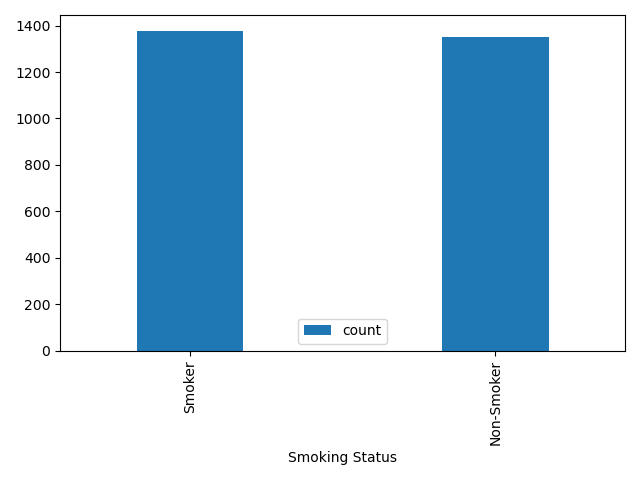

In [66]:
type1_yesfam_smoke.plot.bar(x='Smoking Status', subplots=False, width=bar_width, stacked=False)
plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()